# Desafío Caudal
Gabriela Rivera

## Librerías

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import random
from scipy import stats
from math import sqrt
import datetime as dt
import matplotlib.dates as mdates


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE



import warnings
warnings.filterwarnings("ignore")

#------------------------------------------------#
sns.set(style= 'ticks')
random.seed(23)


## Lectura Archivo e Información

In [2]:
df = pd.read_csv('caudal_extra.csv', index_col= 0)
df.head(150)

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.000000,NaN
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.000000,NaN
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.000000,NaN
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.000000,NaN
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.000000,NaN
5,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-27 00:00:00+00:00,0.822,4540001,Rio Grande En Paloma 1,0.000000,NaN
6,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-09-16 00:00:00+00:00,0.910,4540001,Rio Grande En Paloma 1,0.000000,NaN
7,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-10-31 00:00:00+00:00,2.070,4540001,Rio Grande En Paloma 1,0.000000,NaN
8,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-11-26 00:00:00+00:00,4.410,4540001,Rio Grande En Paloma 1,0.000000,NaN
9,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-12-04 00:00:00+00:00,5.480,4540001,Rio Grande En Paloma 1,0.000000,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411180 entries, 0 to 1411179
Data columns (total 16 columns):
codigo_estacion           1411180 non-null int64
institucion               1411180 non-null object
fuente                    1411180 non-null object
nombre                    1411180 non-null object
altura                    1411180 non-null int64
latitud                   1411180 non-null float64
longitud                  1411180 non-null float64
codigo_cuenca             1411180 non-null int64
nombre_sub_cuenca         1411180 non-null object
cantidad_observaciones    1411180 non-null int64
fecha                     1411180 non-null object
caudal                    1411180 non-null float64
gauge_id                  1411180 non-null int64
gauge_name                1411180 non-null object
precip_promedio           1383413 non-null float64
temp_max_promedio         1259617 non-null float64
dtypes: float64(5), int64(5), object(6)
memory usage: 183.0+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
codigo_estacion,1411180.0,6.279953e+06,2.891695e+06,1.020003e+06,4.320001e+06,5.734001e+06,8.308000e+06,1.287600e+07
altura,1411180.0,5.855691e+02,8.652682e+02,0.000000e+00,4.500000e+01,3.950000e+02,7.500000e+02,4.370000e+03
latitud,1411180.0,-3.367748e+01,6.940820e+00,-5.404110e+01,-3.721190e+01,-3.359390e+01,-2.994580e+01,-1.823250e+01
longitud,1411180.0,-7.121826e+01,1.174363e+00,-7.328330e+01,-7.206810e+01,-7.125470e+01,-7.053280e+01,-6.814390e+01
codigo_cuenca,1411180.0,6.255881e+01,2.839921e+01,1.000000e+01,4.300000e+01,5.700000e+01,8.300000e+01,1.280000e+02
cantidad_observaciones,1411180.0,1.573983e+04,7.545197e+03,8.020000e+02,1.025500e+04,1.488900e+04,2.061100e+04,3.666700e+04
caudal,1411180.0,9.552229e+01,2.526337e+02,0.000000e+00,1.250000e+00,8.950000e+00,6.970000e+01,1.580500e+04
gauge_id,1411180.0,6.279953e+06,2.891695e+06,1.020003e+06,4.320001e+06,5.734001e+06,8.308000e+06,1.287600e+07
precip_promedio,1383413.0,1.921009e+00,7.361936e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.586000e+02
temp_max_promedio,1259617.0,1.921110e+01,7.307081e+00,-1.905000e+01,1.370000e+01,1.908429e+01,2.520000e+01,4.150000e+01


In [5]:
types = pd.DataFrame(df.dtypes)
types = types.rename(columns={0:'DataType'})
types

,DataType
codigo_estacion,int64
institucion,object
fuente,object
nombre,object
altura,int64
latitud,float64
longitud,float64
codigo_cuenca,int64
nombre_sub_cuenca,object
cantidad_observaciones,int64


## EDA

In [6]:
df.isnull().sum()

codigo_estacion                0
institucion                    0
fuente                         0
nombre                         0
altura                         0
latitud                        0
longitud                       0
codigo_cuenca                  0
nombre_sub_cuenca              0
cantidad_observaciones         0
fecha                          0
caudal                         0
gauge_id                       0
gauge_name                     0
precip_promedio            27767
temp_max_promedio         151563
dtype: int64

In [7]:
faltantes = df.isnull().sum().to_frame('Valores nulos')
p = round(faltantes["Valores nulos"])
p = round((p/len(df))*100)
  
faltantes = faltantes.merge(p.to_frame(), left_index = True, right_index = True)
faltantes.rename(columns = {'Valores nulos_x': 'Cantidad de NaN', 'Valores nulos_y':'% de NaN'}, inplace= True)
faltantes

,Cantidad de NaN,% de NaN
codigo_estacion,0,0.0
institucion,0,0.0
fuente,0,0.0
nombre,0,0.0
altura,0,0.0
latitud,0,0.0
longitud,0,0.0
codigo_cuenca,0,0.0
nombre_sub_cuenca,0,0.0
cantidad_observaciones,0,0.0


In [8]:
#pandas_profiling.ProfileReport(df)

In [9]:
# profile = df.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="output.html")

### Remplazo datos faltantes
Para ello, se toma la media por nombre de caudal en un groupby, y luego este valor se utiliza para reempalzar los datos faltantes donde el nombre coincida, esto se hace para mantener la distribución de los datos, ya que no es lo mismo reemplazar por una media general que con una mas acotada.

In [10]:
temp = df.groupby('nombre')[['temp_max_promedio','precip_promedio']].transform('mean').fillna(0)
df[['temp_max_promedio','precip_promedio']] = df[['temp_max_promedio','precip_promedio']].fillna(temp)


### Modificación de columna Fecha
Se modifica la columna fecha para que solo contenga la fecha, considerandose esta como año y mes.
Esto se debe principalmente a que las horas y los días no tiene tanto impacto en el anális que se desea llevar a cabo.
Además se crea una columna que contiene solamente el número de los meses que acompañan a cada año, esta se utulizará más adelante para poder obvservar y trabajar con las estaciones del año.

In [11]:
#df['fecha']=pd.to_datetime(df['fecha']).dt.strftime('%Y/%m/%d')
df['fecha'] = df['fecha'].str.split(' ', expand=True)[0]
df['fecha'] = pd.to_datetime(df['fecha'])
type(df['fecha'])

pandas.core.series.Series

In [12]:
df['mes']=pd.to_datetime(df['fecha']).dt.strftime('%m')

## Plots de precipitación, temperatura y caudal

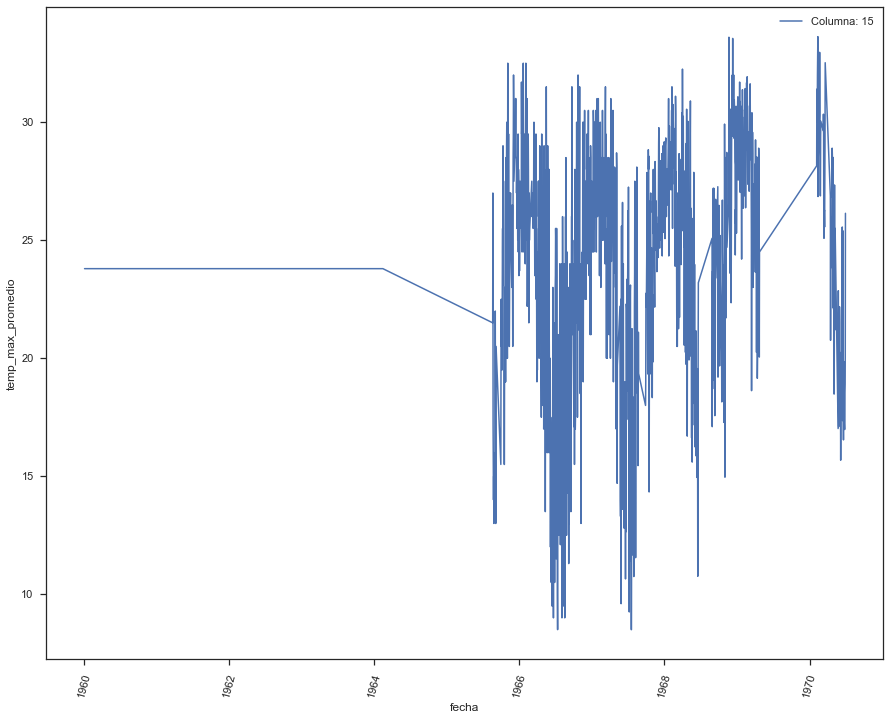

In [89]:
def time_plot_una_estacion(codigo_estacion, columna, fecha_min, fecha_max):
    
    plt.figure(figsize=[15,12])
    
    data = df[(df['codigo_estacion'] == codigo_estacion)][(df['fecha']>= fecha_min) & (df['fecha']<= fecha_max)]
    ax = sns.lineplot(x = 'fecha', y = data.iloc[:,columna], data=data,  label ='Columna: {}'.format(columna))
    
    plt.xticks(rotation=75)
    
    return 
     

time_plot_una_estacion(4540001, 15, '1960/01/01', '1970/07/01' )


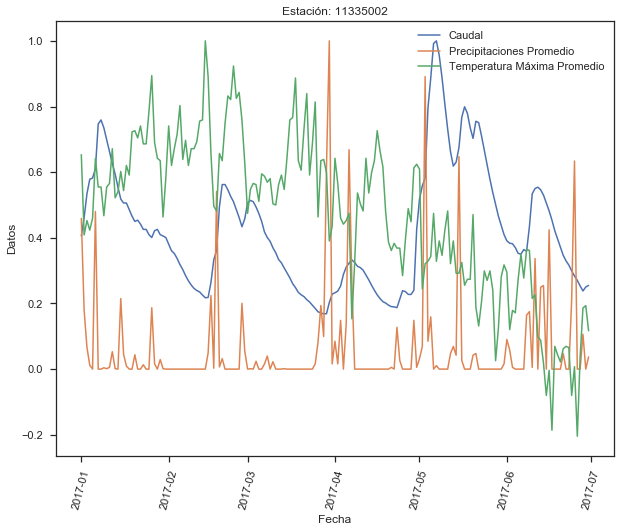

In [88]:
def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):
    
    plt.figure(figsize=[10,8])
    
    data = df[(df['codigo_estacion'] == codigo_estacion)][(df['fecha']>= fecha_min) & (df['fecha']<= fecha_max)].loc[:,columnas]
    fecha = df[(df['codigo_estacion'] == codigo_estacion)][(df['fecha']>= fecha_min) & (df['fecha']<= fecha_max)].loc[:,'fecha']

    data['fecha']= fecha
    
    
    data[columnas[0]] = [float(i)/max(data[columnas[0]]) for i in data[columnas[0]]]
    data[columnas[1]] = [float(i)/max(data[columnas[1]]) for i in data[columnas[1]]]
    data[columnas[2]] = [float(i)/max(data[columnas[2]]) for i in data[columnas[2]]]
    
    ax = sns.lineplot(x = data.iloc[:,3], y = data[columnas[0]],data=data,label = 'Caudal', estimator=None)
    ax = sns.lineplot(x = data.iloc[:,3], y = data[columnas[1]],data=data,label = 'Precipitaciones Promedio', estimator=None)
    ax = sns.lineplot(x = data.iloc[:,3], y = data[columnas[2]],data=data,label = 'Temperatura Máxima Promedio', estimator=None)
   


    plt.xticks(rotation=75)
    plt.xlabel('Fecha')
    plt.ylabel('Datos')
    plt.title('Estación: {}'.format(codigo_estacion))
    
    plt.legend(loc = 1)
    plt.show()
    
    return 

time_plot_estaciones_varias_columnas(11335002, ['caudal', 'precip_promedio','temp_max_promedio'], '2017/01/01', '2017/07/30')


## Variables Nuevas 
* caudal_extremo
* temp_extremo 
* precip_extremo

Me parece que calcular los valores exptremos por cuenca y por estaciones es algo bastante lógico, tambien existen otros valores que se podrían utilizar para el encontrar estos valores extremos como lo es la trim_mean. Además conciderando que nos encontramos ante granves problemas hídricos en el pais concideraría observan a aquellas cuencas que se encuentra bajo un percentil razonable.

In [15]:
# Columna de estaciones para ayudar en el filtro de valores extremos
verano =['01','02','03'] 
otoño = ['04','05','06']
invierno =['07','08','09']
primavera = ['10','11','12']

df.loc[(df['mes'].isin(verano)), 'estacion'] = 'verano'
df.loc[(df['mes'].isin(otoño)), 'estacion'] = 'otoño'
df.loc[(df['mes'].isin(invierno)), 'estacion'] = 'invierno'
df.loc[(df['mes'].isin(primavera)), 'estacion'] = 'primavera'


In [16]:
q = df.groupby(by= ['codigo_estacion','estacion']).quantile(.95).loc[:,['caudal','temp_max_promedio','precip_promedio']]

In [17]:
df['caudal_extremo'] = np.where((df['codigo_estacion'].isin(q.index.get_level_values(0))) & \
                           (df['estacion'].isin(q.index.get_level_values(1))) & \
                                 (df['caudal'].gt(pd.Series(q['caudal'].values))),1,0 )

In [18]:
df['temp_extremo'] = np.where((df['codigo_estacion'].isin(q.index.get_level_values(0))) & \
                           (df['estacion'].isin(q.index.get_level_values(1))) & \
                                 (df['temp_max_promedio'].gt(pd.Series(q['temp_max_promedio'].values))),1,0)

In [19]:
df['precip_extremo'] = np.where((df['codigo_estacion'].isin(q.index.get_level_values(0))) & \
                           (df['estacion'].isin(q.index.get_level_values(1))) & \
                                 (df['precip_promedio'].gt(pd.Series(q['precip_promedio'].values))),1,0)

## Análisis de variable caudal_extremo
Es posible observar que la variable caudal extremo existen 292 instancias concideradas como extremas versus 1410888 que no lo son. Se podría decir entonces que en general se han presentado pocos casos de niveles extremos de caudales a lo largo del país. Estas 292 instancias ocurren en 5 ríos de los cuales tres se encuentran en la zona sur, uno en zona central y uno en zona norte chico. El río que presenta más ocurrencias es el río Palena, seguido por río Maullin. Cabe destacar que si bien el resto de las cuencas presentara comportamientos similares no se puede asumir que su comportamiento es similar, ya que no se han realizados análisis en cuanto a su disminución de caudal o bajas en sus precipitaciones, hay que considerar que el clima de norte a sur en Chile es muy distinto y extremo en algunos casos y esot influye significativamente en las mediciones.

In [20]:
df['caudal_extremo'].value_counts()

0    1410888
1        292
Name: caudal_extremo, dtype: int64

In [21]:
df[df['caudal_extremo']==1]['nombre'].value_counts()

Rio Palena Bajo Junta Rosselot           103
Rio Maullin En Las Quemas                 99
Rio Grande En Paloma 1                    58
Rio Baker En Desague Lago Bertrand        17
Rio Cachapoal En Puente Arqueado (Ca)     15
Name: nombre, dtype: int64

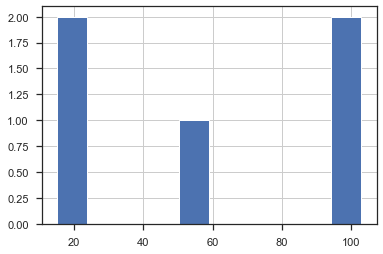

In [22]:
df[df['caudal_extremo']==1]['nombre'].value_counts().hist()

## Predicción de caudal extremo

In [23]:
df.head()
df1 = df.copy()
df1.columns

Index(['codigo_estacion', 'institucion', 'fuente', 'nombre', 'altura',
       'latitud', 'longitud', 'codigo_cuenca', 'nombre_sub_cuenca',
       'cantidad_observaciones', 'fecha', 'caudal', 'gauge_id', 'gauge_name',
       'precip_promedio', 'temp_max_promedio', 'mes', 'estacion',
       'caudal_extremo', 'temp_extremo', 'precip_extremo'],
      dtype='object')

In [24]:
df1 = df1.drop(['institucion','fuente', 'nombre', 'codigo_cuenca', 'nombre_sub_cuenca', 'cantidad_observaciones', 'gauge_id', 'gauge_name'], axis = 1)

In [25]:
df1.head()

,codigo_estacion,altura,latitud,longitud,fecha,caudal,precip_promedio,temp_max_promedio,mes,estacion,caudal_extremo,temp_extremo,precip_extremo
0,4540001,310,-30.6833,-71.050003,1960-01-06,0.812,0.0,23.794585,01,verano,1,1,0
1,4540001,310,-30.6833,-71.050003,1960-03-27,0.236,0.0,23.794585,03,verano,1,1,0
2,4540001,310,-30.6833,-71.050003,1960-05-07,0.730,0.0,23.794585,05,otoño,1,1,0
3,4540001,310,-30.6833,-71.050003,1960-06-30,3.590,0.0,23.794585,06,otoño,1,1,0
4,4540001,310,-30.6833,-71.050003,1960-07-22,1.370,0.0,23.794585,07,invierno,0,1,0


### Prueba de Correlación

In [26]:
prueba_corr = df1.drop(['codigo_estacion', 'caudal_extremo', 'temp_extremo', 'precip_extremo'], axis=1).corr()

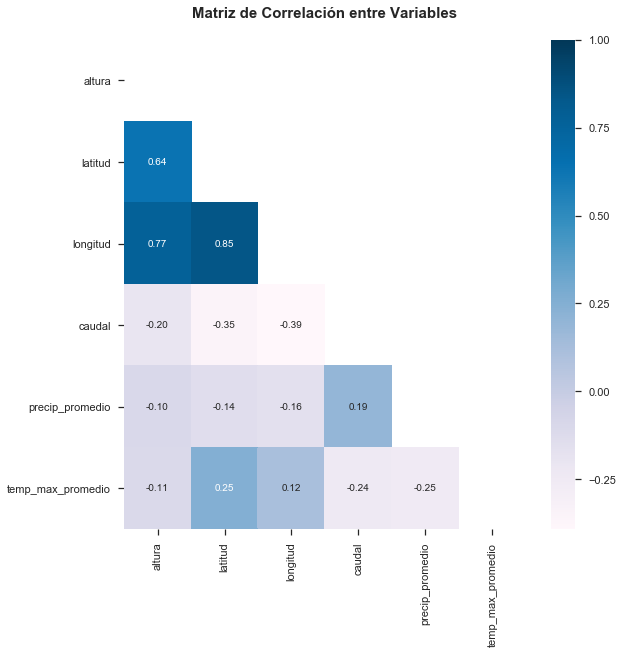

In [27]:
mask = np.zeros_like(prueba_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(9,9))
sns.heatmap(prueba_corr,
            annot=True,
            mask = mask,
            fmt='.2f',
            cmap='PuBu')
plt.yticks(rotation=0) 
plt.title('Matriz de Correlación entre Variables\n',weight = 'bold', fontsize=15)
plt.show()

### Cambio a categorias variable estación del año

In [28]:
df1['estacion'] = df1['estacion'].astype('category')
df1['estacion_num'] = df1['estacion'].cat.codes
df1[['estacion_num', 'estacion']]

,estacion_num,estacion
0,3,verano
1,3,verano
2,1,otoño
3,1,otoño
4,0,invierno
5,0,invierno
6,0,invierno
7,2,primavera
8,2,primavera
9,2,primavera


In [29]:
df1.head()

,codigo_estacion,altura,latitud,longitud,fecha,caudal,precip_promedio,temp_max_promedio,mes,estacion,caudal_extremo,temp_extremo,precip_extremo,estacion_num
0,4540001,310,-30.6833,-71.050003,1960-01-06,0.812,0.0,23.794585,01,verano,1,1,0,3
1,4540001,310,-30.6833,-71.050003,1960-03-27,0.236,0.0,23.794585,03,verano,1,1,0,3
2,4540001,310,-30.6833,-71.050003,1960-05-07,0.730,0.0,23.794585,05,otoño,1,1,0,1
3,4540001,310,-30.6833,-71.050003,1960-06-30,3.590,0.0,23.794585,06,otoño,1,1,0,1
4,4540001,310,-30.6833,-71.050003,1960-07-22,1.370,0.0,23.794585,07,invierno,0,1,0,0


### Determinación de Columnas a utilizar para Modelos

In [30]:
datos = df1.drop(['codigo_estacion', 'longitud', 'fecha', 'mes', 'estacion' ], axis = 1)

In [31]:
datos.head()

,altura,latitud,caudal,precip_promedio,temp_max_promedio,caudal_extremo,temp_extremo,precip_extremo,estacion_num
0,310,-30.6833,0.812,0.0,23.794585,1,1,0,3
1,310,-30.6833,0.236,0.0,23.794585,1,1,0,3
2,310,-30.6833,0.730,0.0,23.794585,1,1,0,1
3,310,-30.6833,3.590,0.0,23.794585,1,1,0,1
4,310,-30.6833,1.370,0.0,23.794585,0,1,0,0


In [32]:
datos['caudal_extremo'].value_counts()

0    1410888
1        292
Name: caudal_extremo, dtype: int64

In [33]:
X = datos.drop(['caudal_extremo'], axis = 1)
y = datos['caudal_extremo']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y ,random_state=0)

### Oversample Caudal extremo

In [68]:
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
no_extremo = X[X.caudal_extremo==0]
extremo = X[X.caudal_extremo==1]

extremo_upsampled = resample(extremo,
                          replace=True, # sample with replacement
                          n_samples=len(no_extremo), # match number in majority class
                          random_state=27) # reproducible results

upsampled = pd.concat([no_extremo, extremo_upsampled])
upsampled.caudal_extremo.value_counts()



1    1128710
0    1128710
Name: caudal_extremo, dtype: int64

In [69]:
y_train = upsampled.caudal_extremo
X_train = upsampled.drop('caudal_extremo', axis=1)

### Regresión Logística

In [82]:
logreg = LogisticRegression(solver= 'liblinear',random_state=0)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
logreg_train = (logreg.score(X_train, y_train)*100).round(2)
logreg_test = (logreg.score(X_test, y_test)*100).round(2)
print('LOGISTIC REGRESSION Train Accuracy: ',logreg_train,'\n')
print('LOGISTIC REGRESSION Test Accuracy: ',logreg_test,'\n')

LOGISTIC REGRESSION Train Accuracy:  89.08 

LOGISTIC REGRESSION Test Accuracy:  87.15 



In [83]:
class_report_lr = classification_report(y_test,y_pred_lr,output_dict=True)
df_lr = pd.DataFrame(class_report_lr).transpose().round(2)
display(df_lr)
print()
cm_lr = pd.DataFrame(confusion_matrix(y_test,y_pred_lr), ['Actual: Caudal No Extremo', 'Actual: Caudal Extremo'], ['Predicción: Caudal No Extremo', 'Predicción: Caudal Extremo'])
display(cm_lr)

,f1-score,precision,recall,support
0,0.93,1.00,0.87,282178.00
1,0.00,0.00,0.90,58.00
accuracy,0.87,0.87,0.87,0.87
macro avg,0.47,0.50,0.88,282236.00
weighted avg,0.93,1.00,0.87,282236.00


,Predicción: Caudal No Extremo,Predicción: Caudal Extremo
Actual: Caudal No Extremo,245918,36260
Actual: Caudal Extremo,6,52


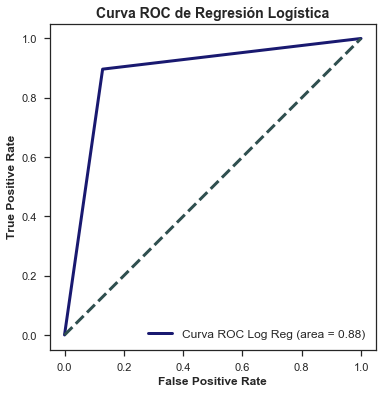

In [84]:
auc_os_lr = metrics.roc_auc_score(y_test, y_pred_lr)
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='midnightblue',lw=3,label='Curva ROC Log Reg (area = {:0.2f})'.format(auc_os_lr))
plt.xlabel('False Positive Rate', weight= 'bold')
plt.ylabel('True Positive Rate', weight= 'bold')
plt.title('Curva ROC de Regresión Logística', weight= 'bold', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], color='darkslategray', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Naive Bayes

In [63]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_train = (nb.score(X_train, y_train)*100).round(2)
nb_test = (nb.score(X_test, y_test)*100).round(2)
print('NAIVE BAYES Train Accuracy: ',nb_train,'\n')
print('NAIVE BAYES Test Accuracy: ',nb_test,'\n')

NAIVE BAYES Train Accuracy:  76.28 

NAIVE BAYES Test Accuracy:  96.98 



In [64]:
class_report_nb = classification_report(y_test,y_pred_nb,output_dict=True)
df_nbayes=pd.DataFrame(class_report_nb).transpose().round(2)
display(df_nbayes)
print()
cm_nb = pd.DataFrame(confusion_matrix(y_test,y_pred_nb), ['Actual: Caudal No Extremo', 'Actual: Caudal Extremo'], ['Predicción: Caudal No Extremo', 'Predicción: Caudal Extremo'])
display(cm_nb)

,f1-score,precision,recall,support
0,0.98,1.00,0.97,282178.00
1,0.01,0.00,0.60,58.00
accuracy,0.97,0.97,0.97,0.97
macro avg,0.50,0.50,0.79,282236.00
weighted avg,0.98,1.00,0.97,282236.00


,Predicción: Caudal No Extremo,Predicción: Caudal Extremo
Actual: Caudal No Extremo,273674,8504
Actual: Caudal Extremo,23,35


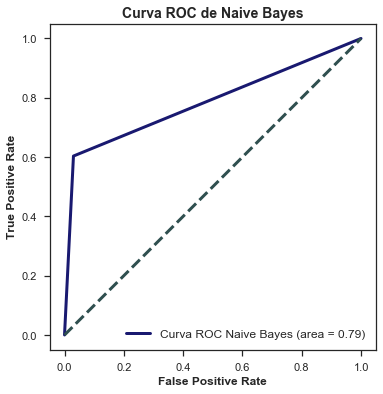

In [65]:
auc_os_nb = metrics.roc_auc_score(y_test, y_pred_nb)
fpr, tpr, _ = roc_curve(y_test, y_pred_nb)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='midnightblue',lw=3,label='Curva ROC Naive Bayes (area = {:0.2f})'.format(auc_os_nb))
plt.xlabel('False Positive Rate', weight= 'bold')
plt.ylabel('True Positive Rate', weight= 'bold')
plt.title('Curva ROC de Naive Bayes', weight= 'bold', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], color='darkslategray', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Decision Tree

In [70]:
dtree = DecisionTreeClassifier(random_state = 0)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
dtree_train = (dtree.score(X_train, y_train)*100).round(2)
dtree_test = (dtree.score(X_test, y_test)*100).round(2)
print('DECISION TREE Train Accuracy: ',dtree_train,'\n')
print('DECISION TREE Test Accuracy: ',dtree_test,'\n')

DECISION TREE Train Accuracy:  100.0 

DECISION TREE Test Accuracy:  99.98 



In [71]:
class_report_dt = classification_report(y_test,y_pred_dtree,output_dict=True)
df_dtree= pd.DataFrame(class_report_dt).transpose().round(2)
display(df_dtree)
print()
cm_dtree = pd.DataFrame(confusion_matrix(y_test,y_pred_dtree), ['Actual: Caudal No Extremo', 'Actual: Caudal Extremo'], ['Predicción: Caudal No Extremo', 'Predicción: Caudal Extremo'])
display(cm_dtree)

,f1-score,precision,recall,support
0,1.00,1.00,1.00,282178.0
1,0.31,0.36,0.28,58.0
accuracy,1.00,1.00,1.00,1.0
macro avg,0.66,0.68,0.64,282236.0
weighted avg,1.00,1.00,1.00,282236.0


,Predicción: Caudal No Extremo,Predicción: Caudal Extremo
Actual: Caudal No Extremo,282150,28
Actual: Caudal Extremo,42,16


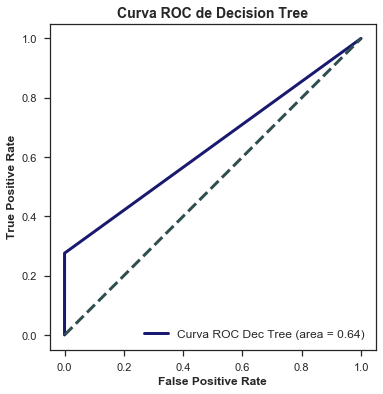

In [72]:
auc_os_dtree = metrics.roc_auc_score(y_test, y_pred_dtree)
fpr, tpr, _ = roc_curve(y_test, y_pred_dtree)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='midnightblue',lw=3,label='Curva ROC Dec Tree (area = {:0.2f})'.format(auc_os_dtree))
plt.xlabel('False Positive Rate', weight= 'bold')
plt.ylabel('True Positive Rate', weight= 'bold')
plt.title('Curva ROC de Decision Tree', weight= 'bold', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], color='darkslategray', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### Random Forrest

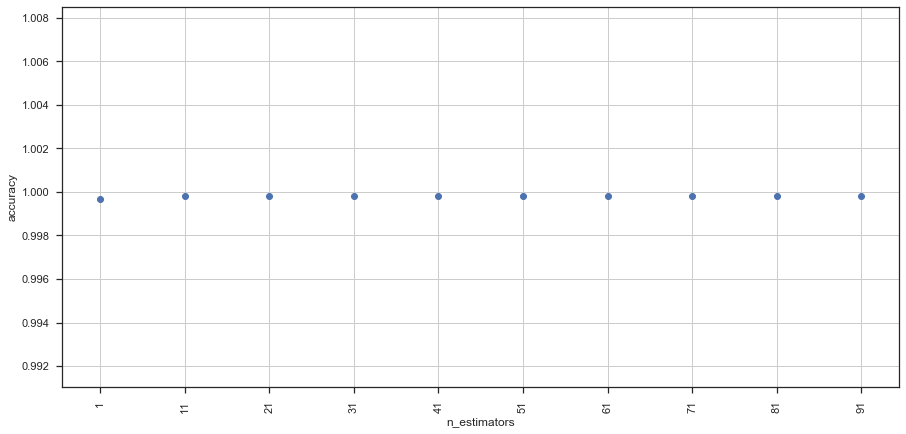

In [78]:
estim_range = range(1,100,10)
scores_test = []

for e in estim_range:
    rforest = RandomForestClassifier(n_estimators= e, random_state=5)
    rforest.fit(X_train,y_train)
    scores_test.append(rforest.score(X_test, y_test))

plt.figure(figsize=(15,7))
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.scatter(estim_range, scores_test, c='b')
plt.xticks(range(1,100,10), rotation=90)
plt.grid(True)
plt.show()

In [77]:
rforest = RandomForestClassifier(n_estimators=11, random_state=0)
rforest.fit(X_train,y_train)
y_pred_rforest = rforest.predict(X_test)
rforest_train = (rforest.score(X_train, y_train)*100).round(2)
rforest_test = (rforest.score(X_test, y_test)*100).round(2)
print('RANDOM FOREST Train Accuracy: ',rforest_train,'\n')
print('RANDOM FOREST Test Accuracy: ',rforest_test,'\n')

RANDOM FOREST Train Accuracy:  100.0 

RANDOM FOREST Test Accuracy:  99.98 



In [80]:
class_report_rf = classification_report(y_test,y_pred_rforest,output_dict=True)
df_rforest= pd.DataFrame(class_report_rf).transpose().round(2)
display(df_rforest)
print()
cm_rforest = pd.DataFrame(confusion_matrix(y_test,y_pred_rforest), ['Actual: Caudal No Extremo', 'Actual: Caudal Extremo'], ['Predicción: Caudal No Extremo', 'Predicción: Caudal Extremo'])
display(cm_rforest)

,f1-score,precision,recall,support
0,1.00,1.00,1.00,282178.0
1,0.39,0.57,0.29,58.0
accuracy,1.00,1.00,1.00,1.0
macro avg,0.69,0.78,0.65,282236.0
weighted avg,1.00,1.00,1.00,282236.0


,Predicción: Caudal No Extremo,Predicción: Caudal Extremo
Actual: Caudal No Extremo,282165,13
Actual: Caudal Extremo,41,17


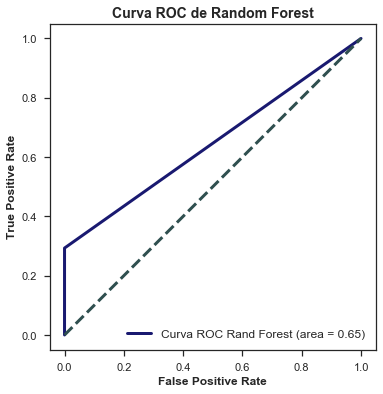

In [81]:
auc_os_rforest = metrics.roc_auc_score(y_test, y_pred_rforest)
fpr, tpr, _ = roc_curve(y_test, y_pred_rforest)

plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color='midnightblue',lw=3,label='Curva ROC Rand Forest (area = {:0.2f})'.format(auc_os_rforest))
plt.xlabel('False Positive Rate', weight= 'bold')
plt.ylabel('True Positive Rate', weight= 'bold')
plt.title('Curva ROC de Random Forest', weight= 'bold', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], color='darkslategray', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

### ¿Qué datos podemos usar y cuáles no? Por supuesto, no podemos usar datos del futuro, pero ¿es lícito usar información del mismo día? ¿del día anterior? 

* Luego de observar las variables mediante relaciones con correlación se determino que las variables a utilizar son: altura	latitud	caudal, precip_promedio, temp_max_promedio, caudal_extremo, temp_extremo, precip_extremo, estacion_num. Estas variables seeccionadas influyen bastante en si en el caudal de dada cuenca.
* Para poder hacer una predicción del futuro hay que basarse en la historia, ahora esta va a despender mucho de la forma en la que se traten y utilizen los datos, pero sería apropiado utilizar los datos desde el día anterior para poder predecir el día siguiente ya que los días más cercanos al que se quiere predecir tiene un comportamiento más similar que días altamente alejados.

### Haz una propuesta de cómo usar tu modelo en la práctica (por ejemplo: una vez entrenado, voy a tomar los datos de XXX hasta el lunes y predecir para el día siguiente). Dada la propuesta, declara restricciones de información para caudal, temperatura y precipitación

Creo que el modelo debería ser utilizado por caudal específico y estación del año específica, porque cada cuenca tiene un comportamiento diferente y a su vez dentro de la misma el comportamiento varía según la estación del año en la que se evalue. 

## Análisis de resultado del modelo
* Qué performance tiene el modelo? 
* Qué métricas usaste para medir esa performance?
* Cuáles son las variables más importantes? Qué opinión te merecen los resultados?
* Si quisiéramos capturar alrededor de un 70% de los eventos de caudales extremos, Cuál es la precisión de tu modelo con ese porcentaje de captura? Cuéntanos si te
parece útil.

El modelo seleccionado finalmente de todos los testeados es Regresión Logística.
Este modelo tiene:
* LOGISTIC REGRESSION Train Accuracy:  89.06 
* LOGISTIC REGRESSION Test Accuracy:  87.07 

Y dentro de la matriz de confusión se puede obvservar que de 58 casos de caudal extremo el modelo identifica como TP 52 y como FP 6.


Teniendo en cuenta estos valores en comparación con los otros modelos que apesar de tener mayor acurracy, su matriz de confución estos modelos presentan mayores errores al identificar los TP.

Las variables más importantes para poder determinar los caudales son la altura, latitud, longitud y estación del año, esto porque según la ubicación geográfica de cada caudal y el clima determinado por la estación del año en que se encuentre al momento de predecir, van a variar sus temepraturas y sus precipitaciones